# Singular Value Decomposition

In this lesson, we will see a matrix decomposition method that is useful in many applications: **singular value decomposition, SVD**.  In data science, for example, SVD is useful to remove redundant features in the data, while keeping the essential ones. SVD leads to methods for obtaining a least squares solution to an overdetermined linear system of equations. It can be used for the compression of images (as we illustrate below), and also for noise reduction.

SVD works for any non-square matrix $\mathbf{A}$, as long as it is *diagonalizable*.

**SVD** states that **any** matrix $\mathbf{A} \in \Re^{mxn}$ can be factorized as:

$$
\mathbf{A} = \mathbf{U} \; \mathbf{D} \; \mathbf{V^T}
$$

where $\mathbf{U} = \begin{pmatrix} \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} &  & \rule[-1ex]{0.5pt}{2.5ex} \\ u_1 & u_2 & \cdots & u_n \\ \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} &  & \rule[-1ex]{0.5pt}{2.5ex} \end{pmatrix}$ and $\mathbf{V} = \begin{pmatrix} \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} &  & \rule[-1ex]{0.5pt}{2.5ex} \\ v_1 & v_2 & \cdots & v_n \\ \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} &  & \rule[-1ex]{0.5pt}{2.5ex} \end{pmatrix}$ are the orthogonal matrices with orthonormal eigen vectors for $\mathbf{A} \mathbf{A}^T$ and $\mathbf{A}^T \mathbf{A}$ matrices respectively. $\mathbf{D}$ is the diagonal matrix with elements equal to root of the eigen values, i.e. $\sigma = \sqrt{\lambda}$. 

Since $\mathbf{u}$ and $\mathbf{v}$ are *orthonormal* vectors, therefore, the following equations hold:

$$
\mathbf{U}^T \mathbf{U} = \mathbf{V}^T \mathbf{V} = \mathbf{I}
$$

### Proof (optional)

Let's see how we solve for the singular values and vectors, given the above equations.

We have 3 unknowns, $\mathbf{U}$, $\mathbf{D}$ and $\mathbf{V}$, and 3 equations. We can write $\mathbf{A}^T$ as:

$$
\begin{align}
\mathbf{A}^T &= \left ( \mathbf{U} \; \mathbf{D} \; \mathbf{V}^T \right )^T \\
&= \mathbf{V} \; \mathbf{D}^T \; \mathbf{U^T}, \: \: \: \textrm{from } \left ( \mathbf{A} \mathbf{B} \right )^T = \mathbf{B}^T \mathbf{A}^T \\
&= \mathbf{V} \; \mathbf{D} \; \mathbf{U^T}, \: \: \: \textrm{since D is a diagonal matrix}
\end{align}
$$

Let us compute the eigen vectors of $\mathbf{A}^T \mathbf{A}$.

$$
\begin{align}
\mathbf{A}^T \; \mathbf{A} &= \left (\mathbf{V} \; \mathbf{D} \; \mathbf{U^T} \right ) \; \mathbf{U} \; \mathbf{D} \; \mathbf{V}^T \\
&= \mathbf{V} \; \mathbf{D}^2 \mathbf{V}^T
\end{align}
$$

The last equation is equivalent to *eigen-value decomposition*, $\mathbf{A}^T \mathbf{A} \mathbf{V} = \lambda^2 \mathbf{V}$. Note, here the singular values($\lambda^2$) are the eigen values of the matrix $\mathbf{A}^T \mathbf{A}$. We can essentially compute the eigen values and vectors for $\mathbf{A}^T \mathbf{A}$ to solve the unknowns above.

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rc('font', family='serif', size=5)

### Build the decomposition

If we use $\mathbf{u}_1, \mathbf{u}_2$ to denote the *normalized* `major` and `minor` vectors, use $\,\mathbf{s}_1, \mathbf{s}_2$ to denote the lengths of `major` and `minor`, and use $\mathbf{v}_1, \mathbf{v}_2$ to denote the vectors `major_before` and `minor_before` (they are normalized already since they are on the unit circle), we can formulate the above observation as:

$$
\begin{align*}
  A \mathbf{v}_1 = s_1 \mathbf{u}_1 \\
  A \mathbf{v}_2 = s_2 \mathbf{u}_2
\end{align*}
$$

Stacking the two equations together:

$$
  A \begin{bmatrix}
    \mathbf{v}_1 & \mathbf{v}_2
    \end{bmatrix}
    =
    \begin{bmatrix}
    \mathbf{u}_1 & \mathbf{u}_2
    \end{bmatrix}
    \begin{bmatrix}
    s_1 & 0 \\
    0 & s_2
    \end{bmatrix}  
$$

Using $V$ to denote $\begin{bmatrix} \mathbf{v}_1 & \mathbf{v}_2 \end{bmatrix}$, $U$ to denote $\begin{bmatrix} \mathbf{u}_1 & \mathbf{u}_2 \end{bmatrix}$ and $S$ to denote the diagonal scaling matrix, it becomes:

$$
  A\, V = U\, S
$$

Then right-multiply by $V^{-1}$ on both sides:

$$
  A = U\, S\, V^{-1}
$$

Since $\mathbf{v}_1, \mathbf{v}_2$ are orthogonal unit vectors, the matrix $V$ is an orthogonal matrix: $V^T = V^{-1}$ (as we saw in the previous lesson). The equation can also be re-written as:

$$
  A = U\, S\, V^{T}
$$

The columns of $U$ are called left singular vectors, the columns of $V$ are called right singular vectors, and the diagonal elements of $S$ are called singular values. Singular values are essentially **square root** of the eigen values.

## Compute SVD in Python

You can compute the SVD of a matrix using [`numpy.linalg.svd()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html). It returns a tuple: the first element is a 2D array where each column is a left singular vector, the second element is a 1D array of the singular values, and the third element is a 2D array where each row is a right singular vector.

In [2]:
A = np.array([[1,0],[1,3]])
U, S, VT = np.linalg.svd(A)

In [3]:
for u,s,v in zip(U, S, VT):
    print(s, u, v)

3.179586801558725 [0.10911677 0.99402894] [0.34694625 0.93788501]
0.9435188240589356 [ 0.99402894 -0.10911677] [ 0.93788501 -0.34694625]


We can use the `np.allclose()` function to confirm that the decomposition is approximation of the matrix $\mathbf{A}$.

In [4]:
A_svd = U @ np.diag(S) @ VT
print(A_svd)
print(np.allclose(A, A_svd))

[[ 1.0000000e+00 -8.8817842e-16]
 [ 1.0000000e+00  3.0000000e+00]]
True


## Application to Image Compression

Let's look at how we would go about applying **singular value decomposition** in python for image compression. In the below section, we'll attempt to classify handwritten digits.

In [5]:
# Load required libraries
from sklearn.datasets import load_digits

In [6]:
X, y = load_digits(return_X_y=True)

In [7]:
X[0].size

64

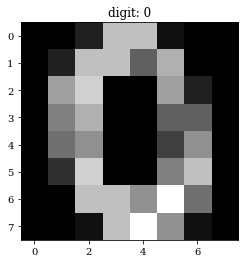

In [8]:
idx = np.random.randint(len(y))
plt.imshow(X[idx].reshape((8,8)), cmap=plt.cm.gray)
plt.title("digit: {}".format(y[idx]))
plt.show()

Without compression, the square image requires space $8^2$ integers. With a rank-*k* approximation, we would only store the truncated **SVD** components: $8k$ integers for $U$, $k$ integers for $S$ and another $8k$ integers for $V^T$. The compression ratio is therefore:

$$
\text{compression ratio}= \frac{8^2}{8k + k + 8k}
$$

This ratio should be greater than 1, namely $k$ should be less than 4. Otherwise, we deviate from the goal of compression.

Let us see using **singular value decomposition** whether we are able to reconstruct the image using only $k=2$ features for each row.

In [9]:
image = X[idx].reshape((8,8))
U, S, VT = np.linalg.svd(image)
Sdiag = np.diag(S)
Sdiag

array([[46.43385153,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , 27.73232343,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , 10.20935306,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  8.63113939,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  5.94561628,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.65464793,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

[[ 0. -2.  1. 11. 11.  5. -1.  0.]
 [ 0.  3. 10. 10.  9. 11.  4.  0.]
 [ 0.  6. 13.  1. -0.  9.  7.  0.]
 [ 0.  6. 11. -0. -1.  7.  6.  0.]
 [ 0.  5. 10. -0. -1.  6.  6.  0.]
 [ 0.  7. 13.  1. -1.  9.  8.  0.]
 [ 0.  4. 13. 12. 11. 14.  6.  0.]
 [ 0. -2.  3. 14. 14.  8. -0.  0.]]


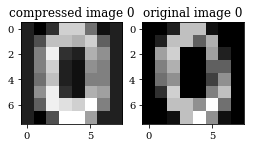

In [10]:
# Take k=2 components only.
k = 2
U_k = U[:,:k]
S_k = Sdiag[:k, :k]
VT_k = VT[:k, :]

imageC = np.round(U_k @ S_k @ VT_k)
print(imageC)

fig = plt.figure(figsize=(4,2))
ax1 = plt.subplot(121)
ax1.imshow(imageC,cmap='gray')
ax1.set_title("compressed image {}".format(y[idx]))
ax2 = plt.subplot(122)
ax2.imshow(image, cmap='gray')
ax2.set_title("original image {}".format(y[idx]))
plt.show()

In [11]:
#Compression ratio
ratio = image.size / (U_k.size + S_k.shape[0] + VT_k.size)
print("Compression ratio: {:.2f}".format(ratio))

Compression ratio: 1.88


Using [`sklearn.decomposition.TruncatedSVD`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) you can use singular value decomposition on practical datasets.

### Note:
Truncated SVD works on term count/tf-idf matrices. In this context, it is also known as **latent semantic analysis (LSA)**.

In [12]:
from sklearn.decomposition import TruncatedSVD

In [13]:
svd = TruncatedSVD(n_components=20, random_state=42)

X_svd = svd.fit_transform(X)
X.shape, X_svd.shape

((1797, 64), (1797, 20))

In [14]:
X_svd = X_svd[:,np.newaxis]
X_svd.shape

(1797, 1, 20)

Notice, each image is reduced to 2 features.

In [15]:
svd.singular_values_

array([2193.11933683,  566.99677184,  542.00493276,  504.1516975 ,
        425.59296526,  353.21824689,  320.3758358 ,  302.07440988,
        279.55696499,  268.51944652,  228.65577044,  224.16478954,
        207.59614516,  197.0120332 ,  185.78753275,  174.75246298,
        170.84804177,  165.44981796,  148.26817998,  144.93403007])

Plot the singular values.

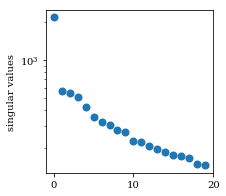

In [16]:
S = svd.singular_values_

fig = plt.figure(figsize=(3,3))
plt.scatter(list(range(len(S))), S, lw=2)
plt.xticks(np.linspace(0,20,3))
plt.yscale('log')
plt.ylabel('singular values')
plt.show()

In [17]:
svd.components_.shape

(20, 64)

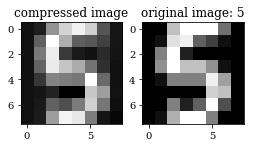

In [18]:
imageC = svd.inverse_transform(X_svd[idx]).reshape((8,8))

fig = plt.figure(figsize=(4,2))
ax1 = plt.subplot(121)
ax1.imshow(imageC, cmap='gray')
ax1.set_title('compressed image')
ax2 = plt.subplot(122)
ax2.imshow(X[idx].reshape((8,8)), cmap='gray')
ax2.set_title('original image: {}'.format(y[idx]))
plt.show()

`svd.explained_variance_ratio_` property gives the percentage of variance transformed by a projection to each component.

In [19]:
svd.explained_variance_ratio_

array([0.02870851, 0.1489005 , 0.13605748, 0.11771282, 0.0838876 ,
       0.0577855 , 0.04752737, 0.04225609, 0.03619554, 0.03339511,
       0.02421063, 0.02327175, 0.01994783, 0.01797684, 0.01598108,
       0.01414419, 0.01351817, 0.01267798, 0.0101819 , 0.00972512])

In [20]:
svd.explained_variance_ratio_.sum()

0.8940620147589284

<div class="alert alert-block alert-success">
    <b> EXCERCISE: </b>
    
   <ul>
    <li> Find the best poly-line that fits the singular values. Plot the "best-fit" poly-line over the singular values plot. </li>
    <li> Obiviously, the reconstructed image quality degrades as we reduce the number of components. Can you quantify how much it will degrade based on the number of components. </li>
    </ul>
</div>

### Additional Excercise

To visualize the singular values and vectors, you can use the `sklearn.fetch_olivetti_faces` dataset. Load the original faces dataset, select a desired number of components and generate the reconstructed image. What are the best reconstructions you can generate ? What is the compression ratio for the same ? 

**Hint**: You can load the faces dataset using the following code cells. Each face image is 64-by-64 pixels.

In [22]:
from sklearn.datasets import fetch_olivetti_faces

X, y = fetch_olivetti_faces(return_X_y=True, random_state=42)
print(X.shape)
print(y.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Abc\scikit_learn_data
(400, 4096)
(400,)


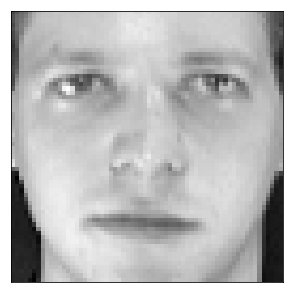

In [25]:
sample_image = X[0].reshape(64,64) 
fig = plt.figure(figsize=(5,5))
plt.imshow(sample_image, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()